In [1]:
from math import sqrt
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
 
# objective function
def objective(x, y):
	return x**2.0 + y**2.0
 
# derivative of objective function
def derivative(x, y):
	return asarray([x * 2.0, y * 2.0])
 
# gradient descent algorithm with nesterov momentum
def nesterov(objective, derivative, bounds, n_iter, step_size, momentum):
	# track all solutions
	solutions = list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# list of changes made to each variable
	change = [0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent
	for it in range(n_iter):
		# calculate the projected solution
		projected = [solution[i] + momentum * change[i] for i in range(solution.shape[0])]
		# calculate the gradient for the projection
		gradient = derivative(projected[0], projected[1])
		# build a solution one variable at a time
		new_solution = list()
		for i in range(solution.shape[0]):
			# calculate the change
			change[i] = (momentum * change[i]) - step_size * gradient[i]
			# calculate the new position in this variable
			value = solution[i] + change[i]
			# store this variable
			new_solution.append(value)
		# store the new solution
		solution = asarray(new_solution)
		solutions.append(solution)
		# evaluate candidate point
		solution_eval = objective(solution[0], solution[1])
		# report progress
		print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
	return solutions
 

In [8]:
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.01
# define momentum
momentum = 0.8
# perform the gradient descent search with nesterov momentum
solutions = nesterov(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)

>0 f([-0.16263687  0.43183601]) = 0.21293
>1 f([-0.15678194  0.41628991]) = 0.19788
>2 f([-0.14905604  0.39577597]) = 0.17886
>3 f([-0.14001781  0.37177753]) = 0.15782
>4 f([-0.13013149  0.34552719]) = 0.13632
>5 f([-0.11977798  0.31803639]) = 0.11549
>6 f([-0.10926527  0.29012287]) = 0.09611
>7 f([-0.09883799  0.26243621]) = 0.07864
>8 f([-0.08868625  0.23548115]) = 0.06332
>9 f([-0.07895356  0.20963876]) = 0.05018
>10 f([-0.06974406  0.18518555]) = 0.03916
>11 f([-0.06112894  0.16231052]) = 0.03008
>12 f([-0.0531521   0.14113029]) = 0.02274
>13 f([-0.04583521  0.12170238]) = 0.01691
>14 f([-0.03918207  0.10403685]) = 0.01236
>15 f([-0.03318236  0.08810634]) = 0.00886
>16 f([-0.02781495  0.0738547 ]) = 0.00623
>17 f([-0.0230506   0.06120431]) = 0.00428
>18 f([-0.01885433  0.05006232]) = 0.00286
>19 f([-0.01518737  0.04032576]) = 0.00186
>20 f([-0.01200873  0.03188577]) = 0.00116
>21 f([-0.0092765   0.02463111]) = 0.00069
>22 f([-0.0069489   0.01845084]) = 0.00039
>23 f([-0.00498509  0

In [4]:
x[:5, :5]

array([[-1. , -0.9, -0.8, -0.7, -0.6],
       [-1. , -0.9, -0.8, -0.7, -0.6],
       [-1. , -0.9, -0.8, -0.7, -0.6],
       [-1. , -0.9, -0.8, -0.7, -0.6],
       [-1. , -0.9, -0.8, -0.7, -0.6]])

In [6]:
y[:5,:5]

array([[-1. , -1. , -1. , -1. , -1. ],
       [-0.9, -0.9, -0.9, -0.9, -0.9],
       [-0.8, -0.8, -0.8, -0.8, -0.8],
       [-0.7, -0.7, -0.7, -0.7, -0.7],
       [-0.6, -0.6, -0.6, -0.6, -0.6]])

<IPython.core.display.Javascript object>


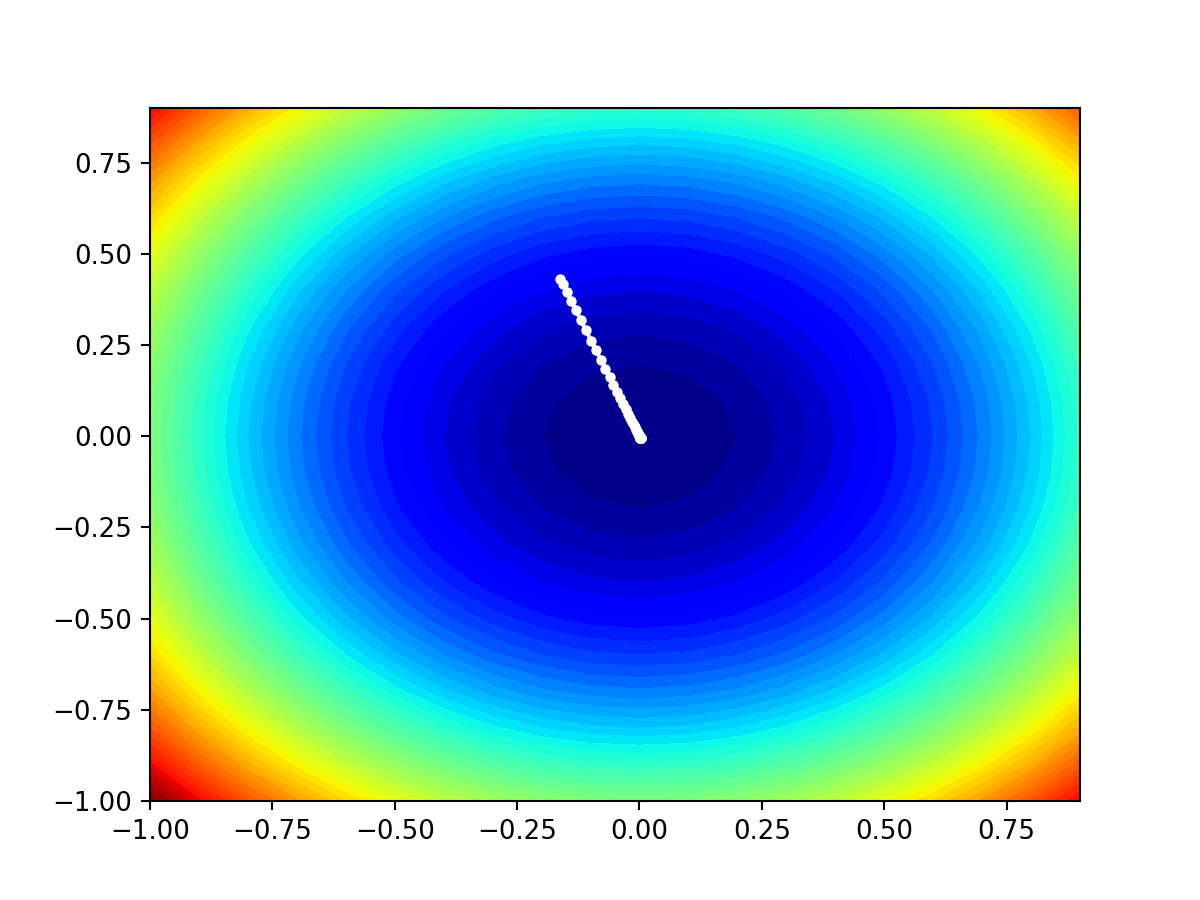

In [13]:
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as white circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()